In [1]:
import pandas as pd

# Load datasets
fraud_data = pd.read_csv('Fraud_Data.csv')
ip_to_country = pd.read_csv('IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('creditcard.csv')

# Display the first few rows of each dataset
print(fraud_data.head())
print(ip_to_country.head())
print(creditcard_data.head())


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China


In [2]:
# Check for missing values
print(fraud_data.isnull().sum())
print(ip_to_country.isnull().sum())
print(creditcard_data.isnull().sum())


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Drop rows with missing values
fraud_data = fraud_data.dropna()
ip_to_country = ip_to_country.dropna()
creditcard_data = creditcard_data.dropna()


In [4]:
# Drop rows with missing values
fraud_data = fraud_data.dropna()
ip_to_country = ip_to_country.dropna()
creditcard_data = creditcard_data.dropna()


In [5]:
# Remove duplicates
fraud_data = fraud_data.drop_duplicates()
ip_to_country = ip_to_country.drop_duplicates()
creditcard_data = creditcard_data.drop_duplicates()


In [6]:
# Convert date and time fields to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])


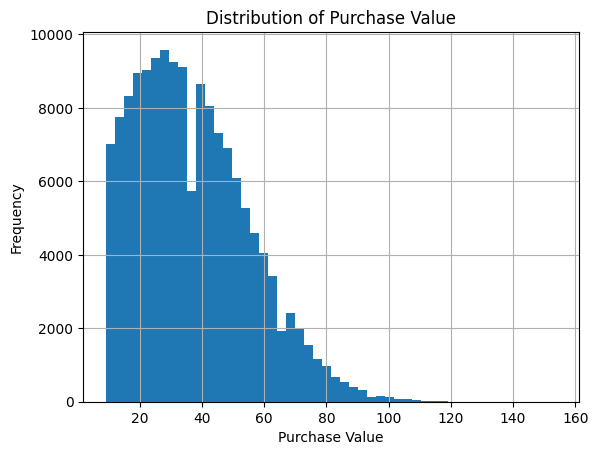

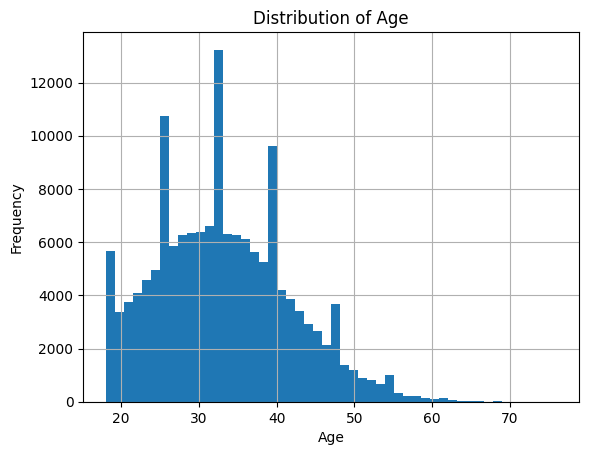

In [7]:
import matplotlib.pyplot as plt

# Univariate analysis
fraud_data['purchase_value'].hist(bins=50)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

fraud_data['age'].hist(bins=50)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


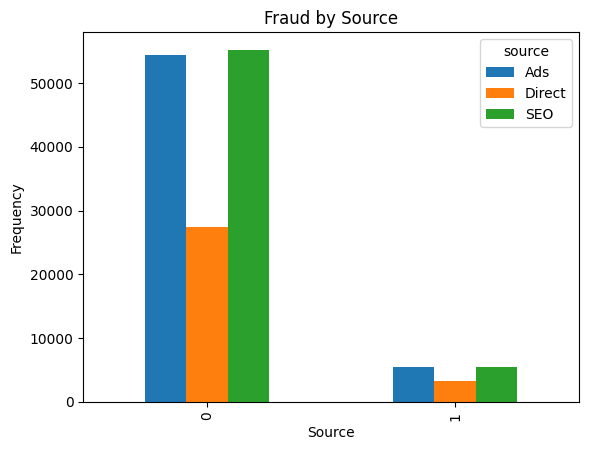

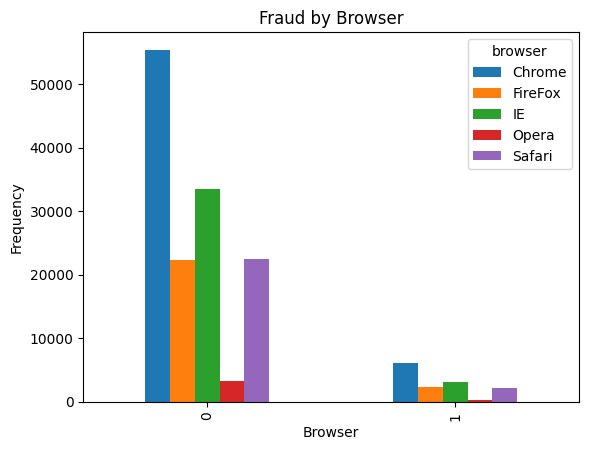

In [8]:
# Bivariate analysis
pd.crosstab(fraud_data['class'], fraud_data['source']).plot(kind='bar')
plt.title('Fraud by Source')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(fraud_data['class'], fraud_data['browser']).plot(kind='bar')
plt.title('Fraud by Browser')
plt.xlabel('Browser')
plt.ylabel('Frequency')
plt.show()


In [10]:
import ipaddress

def is_valid_ip(ip):
    try:
        ipaddress.ip_address(ip)
        return True
    except ValueError:
        return False

# Apply the validation function to identify invalid IP addresses
invalid_ips = fraud_data[~fraud_data['ip_address'].apply(is_valid_ip)]
print(invalid_ips)


        user_id         signup_time       purchase_time  purchase_value  \
0         22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1        333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2          1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3        150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4        221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   
...         ...                 ...                 ...             ...   
151107   345170 2015-01-27 03:03:34 2015-03-29 00:30:47              43   
151108   274471 2015-05-15 17:43:29 2015-05-26 12:24:39              35   
151109   368416 2015-03-03 23:07:31 2015-05-20 07:07:47              40   
151110   207709 2015-07-09 20:06:07 2015-09-07 09:34:46              46   
151111   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   

            device_id  source browser sex  age    ip_address  class  
0       QVPSPJUOCKZAR     SEO

In [11]:
# Drop rows with invalid IP addresses
fraud_data = fraud_data[fraud_data['ip_address'].apply(is_valid_ip)]


In [ ]:
import ipaddress

# Verify column names
print(fraud_data.columns)

# Ensure the correct column name
fraud_data['ip'] = fraud_data['ip'].astype(str)

# Function to validate IP addresses
def is_valid_ip(ip):
    try:
        ipaddress.ip_address(ip)
        return True
    except ValueError:
        return False

# Identify and drop rows with invalid IP addresses
fraud_data = fraud_data[fraud_data['ip'].apply(is_valid_ip)]
ip_to_country = ip_to_country[ip_to_country['lower_bound_ip_address'].apply(is_valid_ip)]
ip_to_country = ip_to_country[ip_to_country['upper_bound_ip_address'].apply(is_valid_ip)]

# Convert IP addresses to integer format
fraud_data['ip'] = fraud_data['ip'].apply(lambda x: int(ipaddress.ip_address(x)))
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)))
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)))
